# MNIST Digit Classification with a Convolutional Neural Network (CNN)
*By Carlos Santiago Bañón*

**Year:** 2020

**Technologies:** Python, NumPy, Matplotlib, TensforFlow, Keras

**Discipline(s):** Computer Vision, Deep Learning

**Keywords:** `classification`, `cnn`, `computer-vision`, `convolution`, `convolutional-neural-network`, `deep-learning`, `fully-connected`, `max-pooling`, `mnist`, `multi-class-classification`, `neural-network`, `2d-convolution`, `2d-max-pooling`

This notebook presents an MNIST digit classifier built with a convolutional neural network (CNN) in TensorFlow and Keras.

## 1. Import Statements

---



In [559]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf

## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the MNIST digit dataset from the Keras datasets library, split it into training and test sets, reshape the matrices, and encode the labels categorically.

In [560]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [561]:
# Divide the data into features and labels.
train_images, train_labels = train_data

test_images, test_labels = test_data

In [562]:
p = 0.01
chance_del_number = np.random.choice(a=[False, True], size=60000, p=[p, 1-p])  
train_images = np.delete(train_images, np.where((train_labels == 8) & chance_del_number)[0], axis=0)
train_labels = np.delete(train_labels, np.where((train_labels == 8) & chance_del_number), axis=0)
print(type(train_images))
permutation = np.random.permutation(len(train_images))
train_images = train_images[permutation]
train_labels = train_labels[permutation]

<class 'numpy.ndarray'>


In [563]:
print(train_images.shape)
print(train_labels.shape)
print(np.unique(train_labels,return_counts=True))

(54209, 28, 28)
(54209,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265,   60, 5949],
      dtype=int64))


# SET DATASET SIZE

In [564]:
DATASET_SIZE=2000
train_images = train_images[:DATASET_SIZE]
train_labels = train_labels[:DATASET_SIZE]

In [565]:
# Reshape and normalize the images.
X_train = train_images.reshape((DATASET_SIZE, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [566]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [567]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (2000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (2000, 10)
Test Labels: (10000, 10)


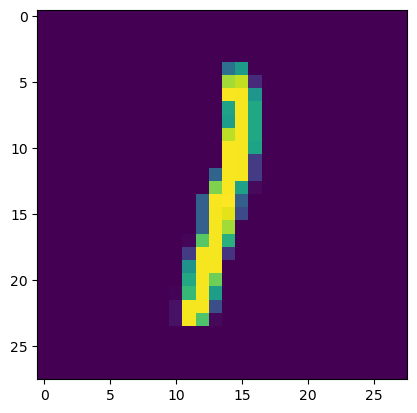

In [568]:
# Show a sample MNIST digit.
plt.imshow(train_images[10])
plt.show()

## 3. Convolutional Neural Network (CNN)

---



### 3.1. Define the Model

We then have to define our convolutional neural network.

In [569]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [570]:
# Define the convolutional neural network.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [571]:
# Show the model.
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_13 (Flatten)        (None, 576)             

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [572]:
# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

We then train the model on 10 epochs, using a batch size of 128.

In [573]:
# Define the parameters.
num_epochs = 10
batch_size = 128

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10
16/16 [==============================] - 1s 62ms/step - loss: 1.7970 - accuracy: 0.4965 - val_loss: 1.7768 - val_accuracy: 0.6878
Epoch 2/10
16/16 [==============================] - 1s 56ms/step - loss: 0.6338 - accuracy: 0.8000 - val_loss: 2.1705 - val_accuracy: 0.7767
Epoch 3/10
16/16 [==============================] - 1s 56ms/step - loss: 0.4031 - accuracy: 0.8715 - val_loss: 1.8116 - val_accuracy: 0.8005
Epoch 4/10
16/16 [==============================] - 1s 56ms/step - loss: 0.2882 - accuracy: 0.9100 - val_loss: 1.4490 - val_accuracy: 0.8219
Epoch 5/10
16/16 [==============================] - 1s 56ms/step - loss: 0.2358 - accuracy: 0.9185 - val_loss: 1.2628 - val_accuracy: 0.8383
Epoch 6/10
16/16 [==============================] - 1s 56ms/step - loss: 0.2147 - accuracy: 0.9265 - val_loss: 1.0754 - val_accuracy: 0.8464
Epoch 7/10
16/16 [==============================] - 1s 56ms/step - loss: 0.1723 - accuracy: 0.9450 - val_loss: 1.0601 - val_accuracy: 0.8562
Epoch 8/10
16

### 3.3. Display the Metrics

Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [574]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.9722 - accuracy: 0.8691
Test Accuracy: 0.8690999746322632
Test Loss: 0.9721873998641968


Then, we save the metric values for each epoch to plot the loss and accuracy curves for our model.

In [575]:
# Save the metrics.
metrics = history.history

Finally, once we have our metric history, we can plot the curves.

In [576]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

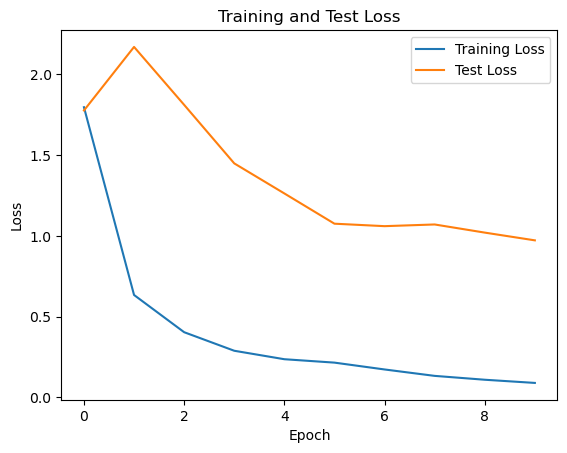

In [577]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [578]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

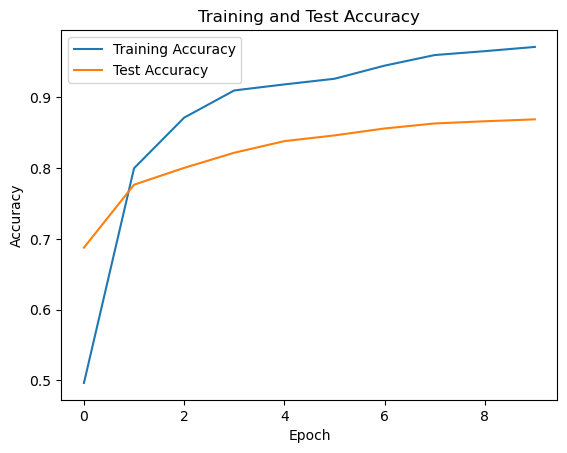

In [579]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [580]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


Finally, we can show a random test image with its corresponding prediction.

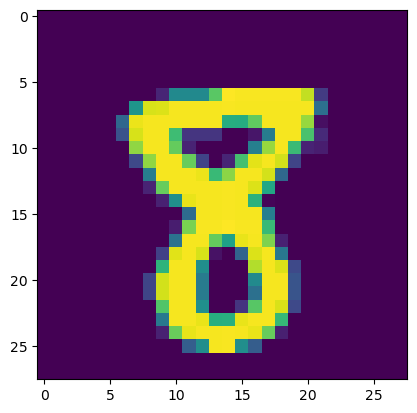

In [581]:
# Choose an index.
index = 128

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [582]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 3


In [583]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

top1_predictions=[np.argmax(preds) for preds in predictions]
correct_test_labels=[np.argmax(label) for label in y_test]
unique, counts = np.unique(correct_test_labels, return_counts=True)
#Create confusion matrix and normalizes it over predicted (columns)
#conf_matr = multilabel_confusion_matrix(y_test, top1_predictions)
conf_matrix=np.zeros((10,10),dtype=np.float64)
for i,y_i in enumerate(correct_test_labels):
    conf_matrix[y_i,top1_predictions[i]]+=1

for i in range(10):
    conf_matrix[i]=conf_matrix[i]/float(counts[i])*100

In [584]:
import pandas as pd
conf_matrix
df = pd.DataFrame(conf_matrix, columns = [i for i in range(10)], index=[i for i in range(10)])

def highlight_cells(s):
    index_max=s.idxmax()
    s2=s.to_numpy()
    #[0:index_max]+s[index_max+1:]
    #print(s)
    
    s2=(np.concatenate((s2[0:index_max],[-1],s2[index_max+1:])))
    #print(s2)
    second_index_max = s2.argmax()
    #print(second_index_max)
    color = 'grey'
    return ['background-color: %s' % "#FF3131"if i==index_max else 'background-color: %s' % "coral" if i==second_index_max else 'background-color: %s' % "#e5e8ec" for i in range(10)]
df=df.style.apply(highlight_cells,axis=1).format(precision=2)



In [585]:
display(df)

,0,1,2,3,4,5,6,7,8,9
0,97.45,0.00,0.20,0.51,0.10,1.12,0.41,0.10,0.00,0.10
1,0.00,98.94,0.44,0.26,0.00,0.00,0.26,0.00,0.00,0.09
2,0.68,0.00,96.22,0.48,0.39,0.48,0.58,1.07,0.00,0.10
3,0.10,0.00,0.79,97.33,0.00,0.59,0.00,0.50,0.00,0.69
4,0.10,0.20,0.20,0.00,95.62,0.00,1.32,0.31,0.00,2.24
5,0.34,0.11,0.00,3.03,0.00,95.85,0.56,0.11,0.00,0.00
6,0.52,0.31,0.31,0.00,0.84,0.63,97.39,0.00,0.00,0.00
7,0.00,0.19,3.79,0.97,0.00,0.00,0.00,92.12,0.00,2.92
8,4.72,2.05,17.97,23.10,0.92,29.47,2.87,1.03,0.00,17.86
9,0.50,0.50,0.50,1.09,0.59,1.09,0.00,0.30,0.00,95.44


In [586]:
top1_predictions

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 3,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 5,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 5,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 3,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 3,
 5,
 6,
 6,
 5,
 7,
 3,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 2,
 1,
 7,
 1,
 9,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 9,
 1,
 2,
 1,
 2,
 5,
 0,
 3,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 3,
 4,
 1,
 7,
 3,
 3,
 5,
 9,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 0,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [587]:
type(y_test)
y_test.shape

(10000, 10)

In [595]:
'''import os
checkpoint_dir = 'weights'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(model=model)
checkpoint.save(checkpoint_prefix+f"Epoch:{2000}")'''

InvalidArgumentError: {{function_node __wrapped__SaveV2_dtypes_34_device_/job:localhost/replica:0/task:0/device:CPU:0}} Failed to create a directory: weights\ckptEpoch:2000-1_temp; Invalid argument [Op:SaveV2]

In [593]:
!pwd

D:/SCUOLA/vault/Tesi
